In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X = np.array([
    [1200, 2, 20], [1500, 3, 15], [1800, 3, 10],
    [2000, 4, 5],  [2300, 4, 3],  [2500, 4, 2],
    [2700, 5, 1],  [3000, 5, 1],  [3200, 6, 1],
    [3500, 6, 0]
])

y = np.array([50, 65, 75, 85, 95, 105, 115, 130, 140, 155])

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
model = LinearRegression()
model.fit(X_scaled, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 101.5
Coefficients: [32.25500266  3.26559886  3.67044244]


In [6]:
y_pred = model.predict(X_scaled)

print("MSE:", mean_squared_error(y, y_pred))
print("R2:", r2_score(y, y_pred))

MSE: 0.7423201874013496
R2: 0.9992829556267555


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_test_pred = model.predict(X_test_scaled)

print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Test MSE: 2.0917500685871535
Test R2: 0.9985125332845602


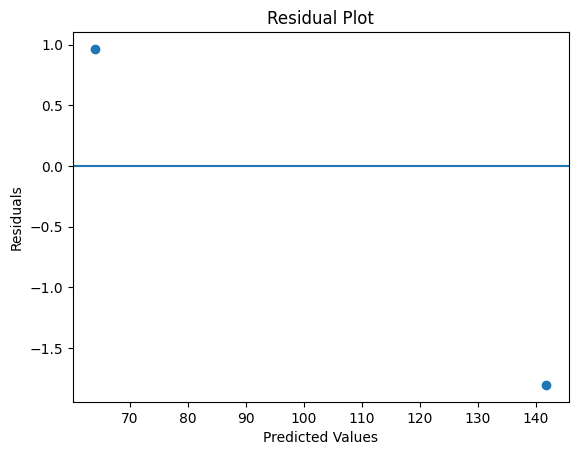

In [12]:
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = pd.DataFrame(X, columns=["Area", "Bedrooms", "Age"])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print(vif_data)       #VIF < 5 → OK
                      #VIF > 10 → Multicollinearity problem

    Feature         VIF
0      Area  224.407200
1  Bedrooms  225.876372
2       Age    1.256622


In [16]:
for feature, coef in zip(["Area", "Bedrooms", "Age"], model.coef_):
    print(f"{feature}: {coef}")

Area: 30.36326353557643
Bedrooms: 3.6635872169632098
Age: 3.716868288834452
